## ADA Project Milestone 3: Final Project and Data Story

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
import time
from datetime import datetime

In C:\Users\Bouhmid\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Bouhmid\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Bouhmid\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\Bouhmid\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Bouhmid\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classi

## Load datasets into pandas Dataframe
- _emdat_public_... is an additional dataset containing the main natural disasters that occured in the world
- _us_disaster_declarations_ is the additional dataset containing all natural disasters in the US from 1953 to 2021. <br>
- _natural_disaster_quotes_ dataset corresponds to the part of the Quotebank dataset that is useful for our project, i.e. it contains quotations citing the incident types. The type of incidents come from the incident_type column in the previous dataset. <br>
Note: We used the provided Google Colab notebook to generate the wanted compressed dataset.

In [3]:
# Load additional datasets

# World dataset : download at https://www.emdat.be/, select 'Natural' and the years from 1960 to 2020 and for all the continents (nd = natural disaters)
nd_world = pd.read_excel('data\emdat_public_2021_12_16_query_uid-NYxNeA.xlsx', header=6)
nd_world.head(3)

C:\Users\Bouhmid\Anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:214: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Dis No,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,...,"Reconstruction Costs, Adjusted ('000 US$)",Insured Damages ('000 US$),"Insured Damages, Adjusted ('000 US$)",Total Damages ('000 US$),"Total Damages, Adjusted ('000 US$)",CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
0,1960-0013-CHL,1960,13,NaN,Natural,Geophysical,Earthquake,Tsunami,NaN,NaN,...,NaN,NaN,NaN,550000.0,4813056.0,11.427251,NaN,NaN,NaN,NaN
1,1960-0026-AIA,1960,26,NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,Donna,...,NaN,NaN,NaN,35000.0,306285.0,11.427251,NaN,NaN,NaN,NaN
2,1960-0025-ANT,1960,25,NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,Donna,...,NaN,NaN,NaN,NaN,NaN,11.427251,NaN,NaN,NaN,NaN


In [4]:
nd_world.columns

Index(['Dis No', 'Year', 'Seq', 'Glide', 'Disaster Group', 'Disaster Subgroup',
       'Disaster Type', 'Disaster Subtype', 'Disaster Subsubtype',
       'Event Name', 'Country', 'ISO', 'Region', 'Continent', 'Location',
       'Origin', 'Associated Dis', 'Associated Dis2', 'OFDA Response',
       'Appeal', 'Declaration', 'Aid Contribution', 'Dis Mag Value',
       'Dis Mag Scale', 'Latitude', 'Longitude', 'Local Time', 'River Basin',
       'Start Year', 'Start Month', 'Start Day', 'End Year', 'End Month',
       'End Day', 'Total Deaths', 'No Injured', 'No Affected', 'No Homeless',
       'Total Affected', 'Reconstruction Costs ('000 US$)',
       'Reconstruction Costs, Adjusted ('000 US$)',
       'Insured Damages ('000 US$)', 'Insured Damages, Adjusted ('000 US$)',
       'Total Damages ('000 US$)', 'Total Damages, Adjusted ('000 US$)', 'CPI',
       'Adm Level', 'Admin1 Code', 'Admin2 Code', 'Geo Locations'],
      dtype='object')

In [5]:
# US dataset : download at https://www.kaggle.com/headsortails/us-natural-disaster-declarations
nd_frame = pd.read_csv('data/us_disaster_declarations.csv')
print("Column names and their data types (more info here: \
https://www.kaggle.com/headsortails/us-natural-disaster-declarations )\n")
print(nd_frame.dtypes)

Column names and their data types (more info here: https://www.kaggle.com/headsortails/us-natural-disaster-declarations )

fema_declaration_string       object
disaster_number                int64
state                         object
declaration_type              object
declaration_date              object
fy_declared                    int64
incident_type                 object
declaration_title             object
ih_program_declared            int64
ia_program_declared            int64
pa_program_declared            int64
hm_program_declared            int64
incident_begin_date           object
incident_end_date             object
disaster_closeout_date        object
fips                           int64
place_code                     int64
designated_area               object
declaration_request_number     int64
hash                          object
last_refresh                  object
id                            object
dtype: object


In [6]:
# Not all are "natural" disasters
nd_types = nd_frame.incident_type.unique()
print(nd_types)

['Tornado' 'Flood' 'Fire' 'Other' 'Earthquake' 'Hurricane' 'Volcano'
 'Severe Storm(s)' 'Toxic Substances' 'Typhoon' 'Drought'
 'Dam/Levee Break' 'Snow' 'Severe Ice Storm' 'Freezing' 'Coastal Storm'
 'Fishing Losses' 'Mud/Landslide' 'Human Cause' 'Terrorist' 'Tsunami'
 'Chemical' 'Biological']


This is the dictionary we use to extract relevant quotations from the Quotebank dataset. As we can see, some of them are similar (multiple kinds of storms), and others are not "natural" disasters (Human Cause, Terrorist, ...). Some modifications are done, for instance we must also add lowercase version of the terms, and we will also ignore some types of incidents in further analysis, e.g. Fire, Snow, ..., since they are hard to work with for what we want to accomplish. As we will see, some of these terms are used in other contexts that may be irrelevant. 

In [7]:
# Load quotation dataset

df_quotes = pd.read_json('data/natural_disaster_quotes.json.bz2', lines=True, compression='bz2')
print(f"Number of quotes: %d" % len(df_quotes.index))

Number of quotes: 1480711


In [8]:
# Load 2nd quotation dataset with quotes containing climate/global warming related words (['climate','warming','global','planet','carbon','environment','temperature'])
df_climate = pd.read_json('data/environment-quotes.json.bz2', lines=True, compression='bz2')
print(f"Number of quotes: %d" % len(df_climate.index))

Number of quotes: 1673053


In [9]:
print("Column names and their data types\n")
print(df_quotes.dtypes)

Column names and their data types

quoteID                   object
quotation                 object
speaker                   object
qids                      object
date              datetime64[ns]
numOccurrences             int64
probas                    object
urls                      object
phase                     object
dtype: object


In [10]:
df_quotes.head(3)

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase
0,2020-01-13-009373,But he said `you're responsible. You make peop...,Tom Elliott,"[Q16196918, Q21461424, Q7815715, Q8952291]",2020-01-13 05:00:53,1,"[[Tom Elliott, 0.5795], [None, 0.4205]]",[https://www.3aw.com.au/tom-elliott-calls-for-...,E
1,2020-03-11-014404,Everything that went wrong was always my fault...,Kate James,[Q56379605],2020-03-11 13:04:58,2,"[[Kate James, 0.8144], [None, 0.1397], [Amber ...",[https://calgarysun.com/entertainment/celebrit...,E
2,2020-04-10-011917,"Great guy, messiest desk I ever saw, like a to...",None,[],2020-04-10 04:00:00,3,"[[None, 0.7283], [Brad Harris, 0.2717]]",[http://newstimes.com/news/coronavirus/article...,E


In [11]:
# Convert the datetime to a simpler format, only keep days (2020-04-26)
df_quotes['date'] = pd.to_datetime(df_quotes['date'].dt.strftime('%Y-%m-%d'))
df_climate['date'] = pd.to_datetime(df_climate['date'].dt.strftime('%Y-%m-%d'))

In [12]:
pd.options.display.max_colwidth = 200 # this is to see most of the text of the quotations
df_quotes.head().quotation
# Lots of irrelevant quotes! 

0                                                                                                                          But he said `you're responsible. You make people think the wrong way about fires.
1    Everything that went wrong was always my fault. I remember one occasion where she missed a connection on a flight on or around Christmas Day in 2012. My aunt was visiting from Australia at that ti...
2    Great guy, messiest desk I ever saw, like a tornado hit a landfill but he knew where everything was! Funniest thing was the time the overnight cleaning crew left a full black garbage bag on his ch...
3        How will they attend to the problems of the people without a full-fledged Ministry? You are not able to provide a Minister in charge of the districts. You are unable to take up flood relief work,
4                                                                                                                           I'm sure you hear it every day but you are smoking hot c

We can see that some terms of crisis can be used in other contexts. For instance, to exagerate a statement or there can be words (e.g. fire) that are used in a lot of fields.

In [26]:
# get data rows from 2015 to 2020 and drop irrelevant rows
nd_frame.drop(nd_frame[nd_frame['fy_declared'] < 2015].index, inplace = True)
nd_frame.drop(nd_frame[nd_frame['fy_declared'] > 2020].index, inplace = True)

nd_frame.drop(nd_frame[nd_frame.incident_type == "Other"].index, inplace = True)
print(nd_frame.head().iloc[:, :7])

      fema_declaration_string  disaster_number state declaration_type  \
44317              DR-4197-NM             4197    NM               DR   
44318              DR-4197-NM             4197    NM               DR   
44319              DR-4197-NM             4197    NM               DR   
44320              DR-4197-NM             4197    NM               DR   
44321              DR-4197-NM             4197    NM               DR   

           declaration_date  fy_declared    incident_type  
44317  2014-10-06T19:20:00Z         2015  Severe Storm(s)  
44318  2014-10-06T19:20:00Z         2015  Severe Storm(s)  
44319  2014-10-06T19:20:00Z         2015  Severe Storm(s)  
44320  2014-10-06T19:20:00Z         2015  Severe Storm(s)  
44321  2014-10-06T19:20:00Z         2015  Severe Storm(s)  


#### Are there Natural Disasters that are more spoken about compared to how often they occur ? If so, why is that ?

Since in a previous analysis, we found that the number of declared natural disasters stabilized after 2000, it may be because before that, not all NDs were declared and added to our data. So we decide to do this analysis for NDs that occured after 2000. Same goes for the quotes, we will select quotes starting from 2000 

Let's see how many times each Natural Disaster occured

In [53]:
nd_count = nd_world[nd_world.Year>=2015][['Disaster Type','Seq']].groupby(by='Disaster Type').count()
nd_count

,Seq
Disaster Type,
Drought,95
Earthquake,143
Extreme temperature,87
Flood,973
Storm,653
Wildfire,70


In [54]:
###Create needed dataframe
df_drought = get_occurrence(df_quotes,'drought')
df_extreme_temp = get_occurrence(df_quotes,'heatwave|heat wave|extreme temperatue|high temperature|extreme heat|very hot')

In [55]:
print(f'length drought = {len(df_drought)}')
print(f'length earthquake = {len(df_earthquake)}')
print(f'length Extreme temperature = {len(df_extreme_temp)}')
print(f'length flood = {len(df_flood)}')
print(f'length storm = {len(df_storm)}')
print(f'length wildfire = {len(df_wildfire)}')

lengths = [len(df_drought),len(df_earthquake),len(df_extreme_temp),len(df_flood),len(df_storm),len(df_wildfire)]

length drought = 36397
length earthquake = 24523
length Extreme temperature = 2305
length flood = 118441
length storm = 153573
length wildfire = 15475


In [56]:
occs = nd_count.Seq.values
overall_ratio={}
for i in range(6):
    overall_ratio[L_keep[i]]=lengths[i]/occs[i]
    print(f'{L_keep[i]} : {lengths[i]/occs[i]}')

Drought : 383.12631578947367
Earthquake : 171.48951048951048
Extreme temperature  : 26.49425287356322
Flood : 121.72764645426516
Storm : 235.18070444104134
Wildfire : 221.07142857142858


We can see that, between 2015 and 2020, the Natural Disaster that is most talked about compared to how often it occurs, is Drought. Extreme temperature and Flood on the other hand are less represented by the quotes and are not very much talked about.

This can be explained by the fact that people see Drought as the most intense ND. It occured only 95 times but was spoken about in almost 37k quotes. Flood on the other hand, is more likely to occur (973 times in 5 years) and thus, people are much more used to it and thus do not over_talk about it.

Now, lets compare this ratios by year

In [57]:
nd_count_by_type_year = nd_world[nd_world.Year>=2000][['Disaster Type','Year','Seq']].groupby(by=['Disaster Type','Year']).count()

In [67]:
nd_world.columns

Index(['Dis No', 'Year', 'Seq', 'Glide', 'Disaster Group', 'Disaster Subgroup',
       'Disaster Type', 'Disaster Subtype', 'Disaster Subsubtype',
       'Event Name', 'Country', 'ISO', 'Region', 'Continent', 'Location',
       'Origin', 'Associated Dis', 'Associated Dis2', 'OFDA Response',
       'Appeal', 'Declaration', 'Aid Contribution', 'Dis Mag Value',
       'Dis Mag Scale', 'Latitude', 'Longitude', 'Local Time', 'River Basin',
       'Start Year', 'Start Month', 'Start Day', 'End Year', 'End Month',
       'End Day', 'Total Deaths', 'No Injured', 'No Affected', 'No Homeless',
       'Total Affected', 'Reconstruction Costs ('000 US$)',
       'Reconstruction Costs, Adjusted ('000 US$)',
       'Insured Damages ('000 US$)', 'Insured Damages, Adjusted ('000 US$)',
       'Total Damages ('000 US$)', 'Total Damages, Adjusted ('000 US$)', 'CPI',
       'Adm Level', 'Admin1 Code', 'Admin2 Code', 'Geo Locations'],
      dtype='object')

C:\Users\Bouhmid\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


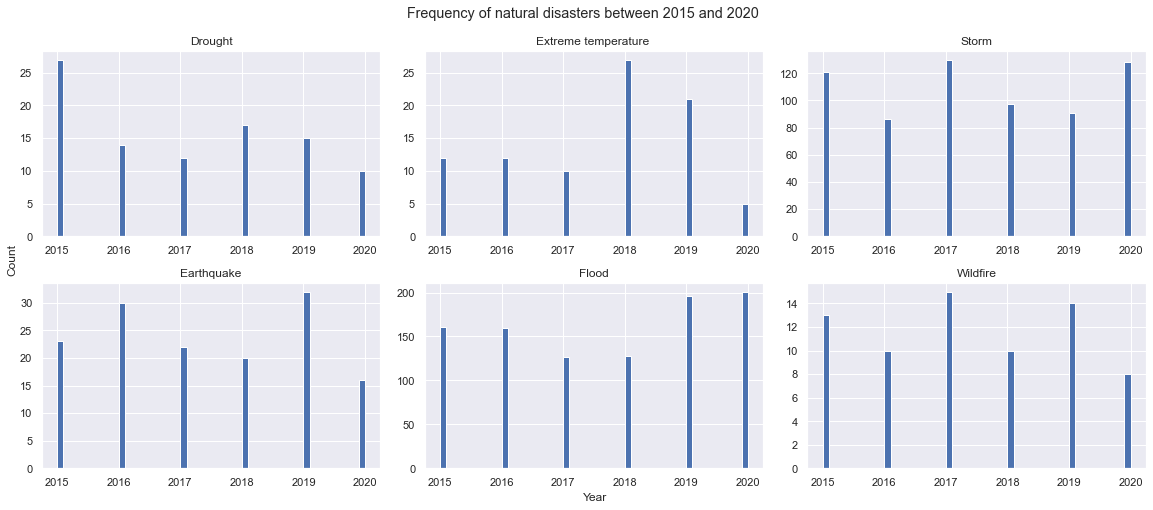

In [96]:
fig, ax = plt.subplots(2, 3, figsize=(16,7), sharey=False, sharex=False)

for i in range(len(L_keep)):
    disaster_name = L_keep[i]
    nd_disaster_name = nd_world[nd_world.Year>=2010][['Disaster Type','Year']][nd_world['Disaster Type'] == disaster_name].copy()
    sbplt = ax[i%2, math.floor(i/2)]
    sbplt.hist(nd_disaster_name.Year.values, range=[2015,2020], bins = 50)
    sbplt.set_title(disaster_name)

fig.text(0.5,0, "Year")
fig.text(0,0.45, "Count", rotation = 90)
fig.suptitle("Frequency of natural disasters between 2015 and 2020")
fig.tight_layout()
fig.savefig('frequ.png')

C:\Users\Bouhmid\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


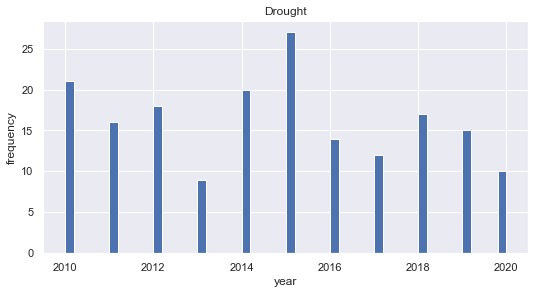

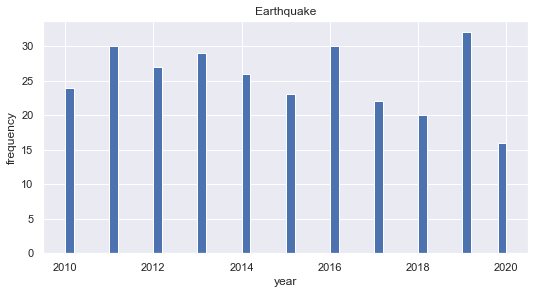

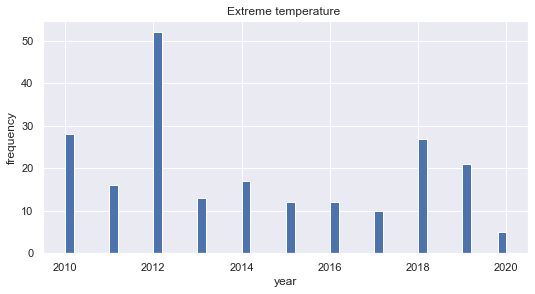

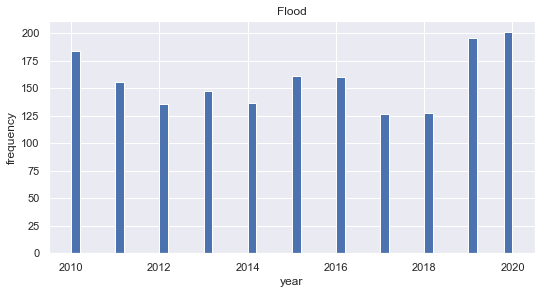

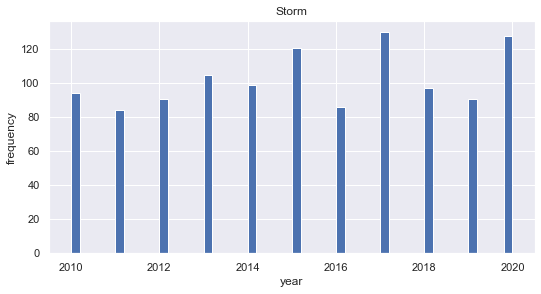

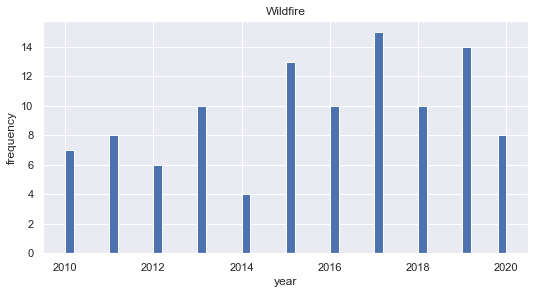

In [89]:
for disaster_name in L_keep:
    nd_disaster_name = nd_world[nd_world.Year>=2010][['Disaster Type','Year']][nd_world['Disaster Type'] == disaster_name].copy()
    nd_disaster_name.hist(bins=50)
    plt.xlabel('year')
    plt.ylabel('frequency')
    plt.title(f'{disaster_name}')
    plt.savefig(f'histogram_{disaster_name}.png')


In [59]:
df_drought['year'] = df_drought.date.apply(lambda x: x.year)
df_earthquake['year'] = df_earthquake.date.apply(lambda x: x.year)
df_extreme_temp['year'] = df_extreme_temp.date.apply(lambda x: x.year)
df_flood['year']= df_flood.date.apply(lambda x: x.year)
df_storm['year']= df_storm.date.apply(lambda x: x.year)
df_wildfire['year']= df_wildfire.date.apply(lambda x: x.year)

C:\Users\Bouhmid\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Bouhmid\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Bouhmid\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [60]:
def process_df(df,disaster_name):
    count_quotes_by_year = df[['year','quoteID']].groupby('year').count()
    ratio_result = {}
    for year in count_quotes_by_year.index:
        nd_count_by_year = nd_count_by_type_year[nd_count_by_type_year.index==(disaster_name,year)].Seq.values[0]
        ratio_result[year] = count_quotes_by_year.loc[year].values[0] / nd_count_by_year
    return ratio_result

In [61]:
ratio_Drought = process_df(df_drought,'Drought')
ratio_Earthquake = process_df(df_earthquake,'Earthquake')
ratio_extreme_temp = process_df(df_extreme_temp,'Extreme temperature ')
ratio_Flood = process_df(df_flood,'Flood')
ratio_Storm = process_df(df_storm,'Storm')
ratio_Wildfire = process_df(df_wildfire,'Wildfire')

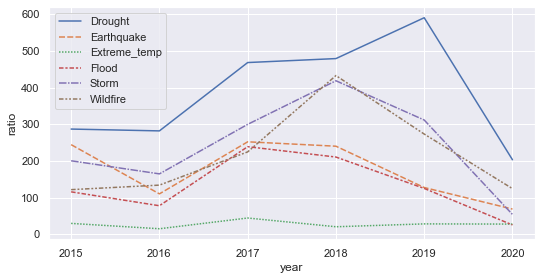

In [62]:
result = pd.DataFrame(columns=['year','Drought','Earthquake','Extreme_temp','Flood','Storm','Wildfire'])
result.year = list(ratio_Drought.keys())
result.Drought = list(ratio_Drought.values())
result.Earthquake = list(ratio_Earthquake.values())
result.Extreme_temp = list(ratio_extreme_temp.values())
result.Flood = list(ratio_Flood.values())
result.Storm = list(ratio_Storm.values())
result.Wildfire = list(ratio_Wildfire.values())
result = result.set_index('year')
plt.ylabel('ratio')
sns.lineplot(data=result).figure.savefig('ratio_per_year.png')

In [63]:
dfu = result.unstack().reset_index()
dfu.columns = ['ND','year','ratio']

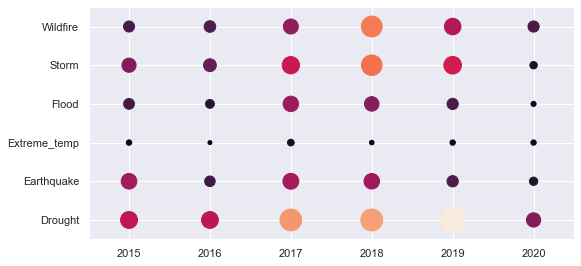

In [64]:
plt.scatter(x="year", y="ND", s="ratio", c='ratio', data=dfu)
plt.margins(.1)
plt.show()